# Import

In [100]:
# Import cell 
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [101]:
def save_excel(file, path, file_name, file_type):
    with pd.ExcelWriter(f'{path}/{file_name}.{file_type}', engine = 'openpyxl') as writer:
        for sheet_name, df in file.items():
            df.to_excel(writer, sheet_name = sheet_name, index = False)

In [102]:
!pip install openpyxl

In [103]:
base_path = "/Users/Mahdi/quera_ai/projects/project1/Project1_data"

In [104]:
u1401 = pd.read_excel(base_path + "/U1401.xlsx", sheet_name=None, engine = 'openpyxl')

In [105]:
U1401 = u1401.copy()

In [106]:
file_list = [u1401]
file_names = ['U1401']

# U1401Data

In [107]:
print(u1401['U1401Data'].columns)
u1401['U1401Data'] = u1401['U1401Data'][['Address', 'Fasl', 'weight', 'khanevartype', 'province','town']]

Index(['Address', 'Fasl', 'weight', 'khanevartype', 'Takmil', 'TakmilDescA',
       'TakmilDescB', 'TakmilDescC', 'Jaygozin', 'JaygozinDescA',
       'JaygozinDescB', 'BlkAbdJaygozin', 'RadifJaygozin', 'province', 'town'],
      dtype='object')


In [108]:
u1401['U1401Data'].isna().mean()*100

Address         0.0
Fasl            0.0
weight          0.0
khanevartype    0.0
province        0.0
town            0.0
dtype: float64

# U1401P1

In [109]:
u1401['U1401P1'].isna().mean()*100

Address            0.000000
member             0.000000
relation           0.000000
gender             0.003090
age                0.000000
literacy           6.957596
studying          16.871862
degree            16.871862
occupationalst    13.590793
maritalst         13.589248
dtype: float64

In [110]:
u1401['U1401P1']['age'] = u1401['U1401P1']['age'].astype(int)

In [111]:
max_age_illiterate = max(u1401['U1401P1'][u1401['U1401P1']['literacy'].isna()]['age'])
print(max_age_illiterate)
if max_age_illiterate > 6:
    max_age_illiterate = 6
u1401['U1401P1'].loc[(u1401['U1401P1']['literacy'].isna()) & (u1401['U1401P1']['age'] <= max_age_illiterate), 'literacy'] = 'illiterate'
u1401['U1401P1'].loc[(u1401['U1401P1']['studying'].isna()) & (u1401['U1401P1']['age'] <= max_age_illiterate), 'studying'] = 'No'

6


In [112]:
u1401['U1401P1'].loc[(u1401['U1401P1']['studying'].isna()) & (u1401['U1401P1']['literacy'] == 'illiterate'), 'studying'] = 'No'

In [113]:
u1401['U1401P1'].isna().mean()*100

Address            0.000000
member             0.000000
relation           0.000000
gender             0.003090
age                0.000000
literacy           0.000000
studying           0.000000
degree            16.871862
occupationalst    13.590793
maritalst         13.589248
dtype: float64

In [114]:
u1401['U1401P1'].loc[(u1401['U1401P1']['studying'] == 'No') & (u1401['U1401P1']['degree'] == 'Other') & (u1401['U1401P1']['literacy'] == 'illiterate')]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst


In [115]:
u1401['U1401P1'].loc[(u1401['U1401P1']['literacy'] == 'illiterate'), 'degree'].value_counts()

Series([], Name: count, dtype: int64)

In [116]:
u1401['U1401P1'].loc[(u1401['U1401P1']['literacy'] == 'illiterate'), 'degree'] = 'No degree'

In [117]:
u1401['U1401P1'].isna().mean()*100

Address            0.000000
member             0.000000
relation           0.000000
gender             0.003090
age                0.000000
literacy           0.000000
studying           0.000000
degree             0.000000
occupationalst    13.590793
maritalst         13.589248
dtype: float64

In [118]:
u1401['U1401P1'].loc[u1401['U1401P1']['occupationalst'].isna(), 'occupationalst'] = 'Other'

In [119]:
u1401['U1401P1']['maritalst'].value_counts()

maritalst
Married     33169
Single      18729
Widowed      3125
Divorced      915
Name: count, dtype: int64

In [120]:
u1401['U1401P1'].loc[(u1401['U1401P1']['maritalst'].isna())]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
2,10001000425,3,Child,Male,5,illiterate,No,No degree,Other,NaN
36,10001000938,3,Child,Female,4,illiterate,No,No degree,Other,NaN
39,10001000941,3,Child,Female,4,illiterate,No,No degree,Other,NaN
40,10001000941,4,Child,Female,1,illiterate,No,No degree,Other,NaN
47,10001001330,5,Child,Female,2,illiterate,No,No degree,Other,NaN
...,...,...,...,...,...,...,...,...,...,...
64707,12603319827,4,Child,Male,7,literate,Yes,Elemantry,Other,NaN
64712,12603319832,5,Child,Female,3,illiterate,No,No degree,Other,NaN
64722,12603319841,3,Child,Female,8,literate,Yes,Elemantry,Other,NaN
64723,12603319841,4,Child,Female,6,literate,Yes,Elemantry,Other,NaN


In [121]:
max_age_single = max(u1401['U1401P1'].loc[(u1401['U1401P1']['maritalst'].isna()), 'age'])
u1401['U1401P1'].loc[(u1401['U1401P1']['maritalst'].isna()) & (u1401['U1401P1']['relation'] == 'Child'), 'maritalst'] = 'Single'

In [122]:
u1401['U1401P1'].loc[(u1401['U1401P1']['maritalst'].isna()) & (u1401['U1401P1']['age'] <= max_age_single), 'maritalst'] = 'Single'

In [123]:
u1401['U1401P1'].isna().mean()*100

Address           0.00000
member            0.00000
relation          0.00000
gender            0.00309
age               0.00000
literacy          0.00000
studying          0.00000
degree            0.00000
occupationalst    0.00000
maritalst         0.00000
dtype: float64

# U1401P2

In [124]:
missing_value_u1401p2 = pd.DataFrame(u1401['U1401P2'].isna().mean()*100)
missing_value_u1401p2 = missing_value_u1401p2.reset_index()
missing_value_u1401p2.columns = ['feature', 'percentage']
missing_value_u1401p2[missing_value_u1401p2['percentage'] > 0]

,feature,percentage
1,tenure,0.010221
3,space,0.010221
4,construction,0.010221
5,material,42.745439
43,heatingfuel,1.686513
44,waterheatingfuel,0.214647


In [125]:
cookingfuel_count = pd.DataFrame(u1401['U1401P2']['cookingfuel'].value_counts()).reset_index()
cookingfuel_count.columns = ['cookingfuel', 'count']
common_cookingfuel = cookingfuel_count.iloc[0, 0]

heatingfuel_count = pd.DataFrame(u1401['U1401P2']['heatingfuel'].value_counts()).reset_index()
heatingfuel_count.columns = ['heatingfuel', 'count']
common_heatingfuel = heatingfuel_count.iloc[0, 0]

waterheatingfuel_count = pd.DataFrame(u1401['U1401P2']['waterheatingfuel'].value_counts()).reset_index()
waterheatingfuel_count.columns = ['waterheatingfuel', 'count']
common_waterheatingfuel = waterheatingfuel_count.iloc[0, 0]

In [126]:
u1401['U1401P2'].loc[u1401['U1401P2']['cookingfuel'].isna(), 'cookingfuel'] = common_cookingfuel
u1401['U1401P2'].loc[u1401['U1401P2']['heatingfuel'].isna(), 'heatingfuel'] = common_heatingfuel
u1401['U1401P2'].loc[u1401['U1401P2']['waterheatingfuel'].isna(), 'waterheatingfuel'] = common_waterheatingfuel


In [127]:
missing_value_u1401p2 = pd.DataFrame(u1401['U1401P2'].isna().mean()*100)
missing_value_u1401p2 = missing_value_u1401p2.reset_index()
missing_value_u1401p2.columns = ['feature', 'percentage']
missing_value_u1401p2[missing_value_u1401p2['percentage'] > 0]

,feature,percentage
1,tenure,0.010221
3,space,0.010221
4,construction,0.010221
5,material,42.745439


Question is : Is there any way to fill material ? Is it valuable ?

# U1401P3S01

In [128]:
u1401['U1401P3S01'].isna().mean()*100

Address       0.000000
code          0.000000
purchased     0.000000
gram         71.801030
kilogram     24.610702
price         0.000000
value         0.000000
dtype: float64

In [129]:
print(u1401['U1401P3S01'].columns)

u1401['U1401P3S01'].loc[(u1401['U1401P3S01']['kilogram'].isna()) & (~u1401['U1401P3S01']['price'].isna()), 'kilogram'] = u1401['U1401P3S01']['value'] / u1401['U1401P3S01']['price']


u1401['U1401P3S01'].loc[(~u1401['U1401P3S01']['kilogram'].isna()) & (u1401['U1401P3S01']['price'].isna()), 'price'] = u1401['U1401P3S01']['value'] / u1401['U1401P3S01']['kilogram']


u1401['U1401P3S01'] = u1401['U1401P3S01'].loc[~u1401['U1401P3S01']['kilogram'].isna() | ~u1401['U1401P3S01']['price'].isna()]


Index(['Address', 'code', 'purchased', 'gram', 'kilogram', 'price', 'value'], dtype='object')


In [130]:
print(u1401['U1401P3S01'].isna().mean()*100)

Address       0.00000
code          0.00000
purchased     0.00000
gram         71.80103
kilogram      0.00000
price         0.00000
value         0.00000
dtype: float64


In [131]:
u1401['U1401P3S01'] = u1401['U1401P3S01'][['Address', 'code', 'purchased', 'kilogram', 'value']]
print(u1401['U1401P3S01'].columns)


Index(['Address', 'code', 'purchased', 'kilogram', 'value'], dtype='object')


# U1401P3S02

In [132]:
u1401['U1401P3S02'].isna().mean()*100


Address        0.000000
code           0.000000
purchased      0.000000
gram         100.000000
kilogram      16.623794
price          0.000000
value          0.000000
dtype: float64

In [133]:
u1401['U1401P3S02']['value'] = pd.to_numeric(u1401['U1401P3S02']['value'], errors='coerce')
u1401['U1401P3S02']['kilogram'] = pd.to_numeric(u1401['U1401P3S02']['kilogram'], errors='coerce')

In [134]:
u1401['U1401P3S02'].loc[(u1401['U1401P3S02']['kilogram'].isna()) & (~u1401['U1401P3S02']['price'].isna()), 'kilogram'] = u1401['U1401P3S02']['value'] / u1401['U1401P3S02']['price']
u1401['U1401P3S02'].loc[(~u1401['U1401P3S02']['kilogram'].isna()) & (u1401['U1401P3S02']['price'].isna()), 'price'] = u1401['U1401P3S02']['value'] / u1401['U1401P3S02']['kilogram']
u1401['U1401P3S02'] = u1401['U1401P3S02'].loc[~u1401['U1401P3S02']['kilogram'].isna() | ~u1401['U1401P3S02']['price'].isna()]

In [135]:
u1401['U1401P3S02'].isna().mean()*100


Address        0.0
code           0.0
purchased      0.0
gram         100.0
kilogram       0.0
price          0.0
value          0.0
dtype: float64

In [136]:
u1401['U1401P3S02'] = u1401['U1401P3S02'][['Address', 'code', 'purchased', 'kilogram', 'value']]
print(u1401['U1401P3S02'].columns)

Index(['Address', 'code', 'purchased', 'kilogram', 'value'], dtype='object')


# U1401P3S04

In [137]:
u1401['U1401P3S04'].isna().mean()*100

Address      0.0
code         0.0
mortgage     0.0
purchased    0.0
value        0.0
dtype: float64

Question is : Is there any way to fill purchased & mortgage ?

In [138]:
u1401['U1401P3S04']['purchased'].value_counts()

purchased
1    71158
     14007
8     1536
3      136
5      111
2       27
7        5
6        3
Name: count, dtype: int64

In [139]:
u1401['U1401P3S04'].loc[(u1401['U1401P3S04']['purchased'].isna()) & (~u1401['U1401P3S04']['mortgage'].isna())]

,Address,code,mortgage,purchased,value


In [140]:
u1401['U1401P3S04'].loc[u1401['U1401P3S04']['purchased'].isna(), 'code'].value_counts()

Series([], Name: count, dtype: int64)

In [141]:
pd.set_option('display.max_rows', None)
grouped = u1401['U1401P3S04'].groupby('Address').filter(lambda x: ((x['code'] == 41111).any()) | ((x['code'] == 41112).any()))
print(grouped[((grouped.code == 41111) | (grouped.code == 41111) | (grouped.code == 42111) | (grouped.code == 42211))])
pd.reset_option('display.max_rows')

           Address   code     mortgage purchased      value
0      10001000226  41111                      1   20000000
9      10001000232  41111                      1   10000000
22     10001000241  41111                      1   35000000
52     10001000641  41111                      1   25000000
76     10001001138  41111                      1   50000000
94     10001001532  41111                      1    5500000
99     10001001534  41111                      1    1000000
136    10001002425  41111                      1    5000000
153    10001002438  41111                      1   15000000
162    10002002825  41111                      1   11000000
206    10003003236  41111                      1   13000000
238    10004003838  41111                      1   10000000
244    10004003841  41111                      1   12000000
258    10004004231  41111                      1   23000000
263    10004004235  41111                      1   20000000
297    10005004638  41111               

# U1401P3S[03 + 05 - 12]

In [142]:
# All files are clean except U1401P3S10
# U1401P3S10 is empty

u1401['U1401P3S10']

,Address,code,purchased,value


# U1401P3S13

In [143]:
print(u1401['U1401P3S13'].isna().mean()*100)
print(f"len u1401['U1401P3S13'] = {len(u1401['U1401P3S13'])}")
print(f"len nan value in u1401['U1401P3S13'] = {len(u1401['U1401P3S13'][u1401['U1401P3S13']['value'].isna()])}")
u1401['U1401P3S13'][u1401['U1401P3S13']['value'].isna()]

Address    0.0
code       0.0
value      0.0
dtype: float64
len u1401['U1401P3S13'] = 212472
len nan value in u1401['U1401P3S13'] = 0


,Address,code,value


Fill Null values with median

In [144]:
u1401['U1401P3S13'].loc[u1401['U1401P3S13']['value'] == '          ', 'value'] = None
u1401['U1401P3S13']['value'] = u1401['U1401P3S13']['value'].astype('float64')
p3s13_median = u1401['U1401P3S13'][~u1401['U1401P3S13']['value'].isna()]['value'].median()
u1401['U1401P3S13']['value'] = u1401['U1401P3S13']['value'].fillna(p3s13_median)

ValueError: could not convert string to float: ''

Question is : Is there any way to fill value ?

# U1401P3S14

In [ ]:
u1401['U1401P3S14'].isna().mean()*100

Address      0.0
code         0.0
purchased    0.0
value        0.0
dtype: float64

Question is : Is there any way to fill purchased & value ?

# U1401P4S01

In [145]:
u1401['U1401P4S01'].isna().mean()*100

Address            0.000000
member             0.000000
employed_w         0.000000
ISCO_w             0.008122
ISIC_w             0.000000
status_w           0.000000
hours_w            0.000000
days_w             0.000000
income_w_m         0.000000
income_w_y         0.000000
wage_w_m           0.000000
wage_w_y           0.000000
perk_w_m           0.008122
perk_w_y           0.008122
netincome_w_m      0.000000
netincome_w_y      0.000000
Fasl               0.000000
year               0.000000
DYCOL00          100.000000
dtype: float64

In [146]:
U1401_P4S01_mahdi = u1401['U1401P4S01'][['Address', 'member', 'employed_w', 'ISCO_w', 'ISIC_w', 'status_w' , 'hours_w', 'days_w','income_w_y', 'wage_w_y', 'perk_w_y', 'netincome_w_y', 'Fasl', 'year']]
U1401_P4S01_mahdi.isna().mean()*100

Address          0.000000
member           0.000000
employed_w       0.000000
ISCO_w           0.008122
ISIC_w           0.000000
status_w         0.000000
hours_w          0.000000
days_w           0.000000
income_w_y       0.000000
wage_w_y         0.000000
perk_w_y         0.008122
netincome_w_y    0.000000
Fasl             0.000000
year             0.000000
dtype: float64

In [147]:
print(U1401_P4S01_mahdi[U1401_P4S01_mahdi['wage_w_y'].isna()].index)
print(U1401_P4S01_mahdi[U1401_P4S01_mahdi['perk_w_y'].isna()].index)
U1401_P4S01_mahdi[(U1401_P4S01_mahdi['perk_w_y'].isna()) | (U1401_P4S01_mahdi['wage_w_y'].isna())]

Index([], dtype='int64')
Index([5344], dtype='int64')


,Address,member,employed_w,ISCO_w,ISIC_w,status_w,hours_w,days_w,income_w_y,wage_w_y,perk_w_y,netincome_w_y,Fasl,year
5344,12301273731,3,1,7231.0,45200,3,10,6,325000000,325000000,NaN,325000000,3,1401


In [148]:
U1401_P4S01_mahdi = U1401_P4S01_mahdi[~U1401_P4S01_mahdi['hours_w'].isna()]
U1401_P4S01_mahdi = U1401_P4S01_mahdi[~U1401_P4S01_mahdi['days_w'].isna()]

In [149]:
X = U1401_P4S01_mahdi[(~U1401_P4S01_mahdi['perk_w_y'].isna()) & (~U1401_P4S01_mahdi['wage_w_y'].isna())].drop(['Address', 'member', 'wage_w_y', 'perk_w_y'], axis = 1)
y1 = U1401_P4S01_mahdi[(~U1401_P4S01_mahdi['perk_w_y'].isna()) & (~U1401_P4S01_mahdi['wage_w_y'].isna())]['wage_w_y']
y2 = U1401_P4S01_mahdi[(~U1401_P4S01_mahdi['perk_w_y'].isna()) & (~U1401_P4S01_mahdi['wage_w_y'].isna())]['perk_w_y']

X_train, X_validation, y1_train, y1_validation = train_test_split(X, y1, test_size=0.25, random_state=42)
X_train, X_validation, y2_train, y2_validation = train_test_split(X, y2, test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y1_train)
y1_pred_validation = model.predict(X_validation)
mean_squared_error_1 = mean_squared_error(y1_validation, y1_pred_validation)
r2_score_1 = r2_score(y1_validation, y1_pred_validation)
print("--- wage_w_y ---")
print(f"mean_squared_error = {mean_squared_error_1}")
print(f"r2_score = {r2_score_1}")

model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y2_train)
y2_pred_validation = model.predict(X_validation)
mean_squared_error_2 = mean_squared_error(y2_validation, y2_pred_validation)
r2_score_2 = r2_score(y2_validation, y2_pred_validation)
print("--- perk_w_y ---")
print("--- RandomForestRegressor ---")
print(f"mean_squared_error = {mean_squared_error_2}")
print(f"r2_score = {r2_score_2}")

model = GradientBoostingRegressor()
model.fit(X_train, y2_train)
y2_pred_validation = model.predict(X_validation)
mean_squared_error_2 = mean_squared_error(y2_validation, y2_pred_validation)
r2_score_2 = r2_score(y2_validation, y2_pred_validation)
print("--- perk_w_y ---")
print("--- GradientBoostingRegressor ---")
print(f"mean_squared_error = {mean_squared_error_2}")
print(f"r2_score = {r2_score_2}")

ValueError: could not convert string to float: ''

In [150]:
U1401_P4S01_mahdi = U1401_P4S01_mahdi.loc[(~U1401_P4S01_mahdi['perk_w_y'].isna()) | (~U1401_P4S01_mahdi['wage_w_y'].isna())]

# U1401P4S02

In [151]:
u1401['U1401P4S02'].isna().mean()*100
u1401['U1401P4S02']['income_s_y'] = pd.to_numeric(u1401['U1401P4S02']['income_s_y'], errors='coerce')


In [152]:
u1401['U1401P4S02'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6174 entries, 0 to 6173
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          6174 non-null   int64  
 1   member           6174 non-null   int64  
 2   employed_s       6174 non-null   int64  
 3   ISCO_s           6174 non-null   int64  
 4   ISIC_s           6174 non-null   int64  
 5   status_s         6174 non-null   int64  
 6   agriculture      6174 non-null   int64  
 7   hours_s          6174 non-null   object 
 8   days_s           6174 non-null   object 
 9   cost_employment  6174 non-null   int64  
 10  cost_raw         6174 non-null   int64  
 11  cost_machinery   6174 non-null   int64  
 12  cost_others      6174 non-null   int64  
 13  cost_tax         6174 non-null   int64  
 14  sale             6174 non-null   int64  
 15  income_s_y       6113 non-null   float64
 16  Fasl             6174 non-null   int64  
 17  year          

In [153]:
u1401['U1401P4S02'].columns

Index(['Address', 'member', 'employed_s', 'ISCO_s', 'ISIC_s', 'status_s',
       'agriculture', 'hours_s', 'days_s', 'cost_employment', 'cost_raw',
       'cost_machinery', 'cost_others', 'cost_tax', 'sale', 'income_s_y',
       'Fasl', 'year', 'DYCOL00'],
      dtype='object')

In [154]:
U1401_P4S02_mahdi = u1401['U1401P4S02'][['Address', 'member', 'employed_s', 'ISCO_s', 'ISIC_s', 'status_s', 'agriculture', 'sale', 'income_s_y', 'Fasl', 'year']]
U1401_P4S02_mahdi = U1401_P4S02_mahdi[(~U1401_P4S02_mahdi['employed_s'].isna()) & (~U1401_P4S02_mahdi['ISCO_s'].isna()) & (~U1401_P4S02_mahdi['ISIC_s'].isna()) & (~U1401_P4S02_mahdi['status_s'].isna()) & (~U1401_P4S02_mahdi['agriculture'].isna())]

In [155]:
U1401_P4S02_mahdi.isna().mean()*100

Address        0.000000
member         0.000000
employed_s     0.000000
ISCO_s         0.000000
ISIC_s         0.000000
status_s       0.000000
agriculture    0.000000
sale           0.000000
income_s_y     0.988014
Fasl           0.000000
year           0.000000
dtype: float64

In [156]:
print(len(U1401_P4S02_mahdi[U1401_P4S02_mahdi['sale'].isna()]))
print(len(U1401_P4S02_mahdi[U1401_P4S02_mahdi['sale'] == 0]))
print(len(U1401_P4S02_mahdi[U1401_P4S02_mahdi['income_s_y'].isna()]))
print(len(U1401_P4S02_mahdi[U1401_P4S02_mahdi['income_s_y'] == 0]))


0
362
61
231


In [157]:
U1401_P4S02_mahdi[(U1401_P4S02_mahdi['sale'] == 0) | (U1401_P4S02_mahdi['sale'].isna())]['employed_s'].value_counts()

employed_s
1    349
2     13
Name: count, dtype: int64

In [158]:
U1401_P4S02_mahdi[(U1401_P4S02_mahdi['income_s_y'] == 0) | (U1401_P4S02_mahdi['income_s_y'].isna())]['employed_s'].value_counts()

employed_s
1    280
2     12
Name: count, dtype: int64

In [159]:
U1401_P4S02_mahdi.loc[((U1401_P4S02_mahdi['income_s_y'] == 0) | (U1401_P4S02_mahdi['income_s_y'].isna())) & (U1401_P4S02_mahdi['employed_s'] == 2), 'income_s_y'] = 0
U1401_P4S02_mahdi.loc[((U1401_P4S02_mahdi['sale'] == 0) | (U1401_P4S02_mahdi['sale'].isna())) & (U1401_P4S02_mahdi['employed_s'] == 2), 'sale'] = 0

In [160]:
X = U1401_P4S02_mahdi[~U1401_P4S02_mahdi['sale'].isna()].drop(['Address', 'member', 'sale'], axis = 1)
y1 = U1401_P4S02_mahdi[~U1401_P4S02_mahdi['sale'].isna()]['sale']
X_train, X_validation, y_train, y_validation = train_test_split(X, y1, test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

model = model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000)
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

r2_score = 0.3672084913806538


ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [161]:
U1401_P4S02_mahdi = U1401_P4S02_mahdi[~U1401_P4S02_mahdi['sale'].isna()]

# U1401P4S03

In [162]:
u1401['U1401P4S03'].isna().mean()*100

Address              0.0
member               0.0
income_pension       0.0
income_rent          0.0
income_interest      0.0
income_aid           0.0
income_resale        0.0
income_transfer      0.0
Fasl                 0.0
year                 0.0
DYCOL00            100.0
dtype: float64

In [163]:
u1401_P4S03_mahdi = u1401['U1401P4S03'].drop(['DYCOL00'], axis = 1)

# U1401_P4S04

In [164]:
u1401['U1401P4S04'].isna().mean()*100

Address             0.0
member              0.0
subsidy_number      0.0
subsidy_month       0.0
subsidy             0.0
Fasl                0.0
year                0.0
DYCOL00           100.0
dtype: float64

In [165]:
u1401_P4S04_mahdi = u1401['U1401P4S04'].drop(['DYCOL00'], axis = 1)

# Mahdi's Files

In [166]:
U1401_P4S01_mahdi
U1401_P4S02_mahdi
u1401_P4S03_mahdi
u1401_P4S04_mahdi

,Address,member,subsidy_number,subsidy_month,subsidy,Fasl,year
0,10001000126,1,2,4,3640000,4,1401
1,10001000130,1,1,4,420000,4,1401
2,10001000132,1,1,4,420000,4,1401
3,10001000132,2,1,4,1820000,4,1401
4,10001000135,1,1,4,420000,4,1401
...,...,...,...,...,...,...,...
30767,13006383835,2,1,9,4095000,2,1401
30768,13006383838,1,1,9,945000,2,1401
30769,13006383838,2,2,9,8190000,2,1401
30770,13006383841,1,1,9,945000,2,1401


# U1401_P4S01

In [167]:
U1401_P4S01_mahdi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12312 entries, 0 to 12311
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        12312 non-null  int64  
 1   member         12312 non-null  int64  
 2   employed_w     12312 non-null  object 
 3   ISCO_w         12311 non-null  float64
 4   ISIC_w         12312 non-null  int64  
 5   status_w       12312 non-null  int64  
 6   hours_w        12312 non-null  object 
 7   days_w         12312 non-null  object 
 8   income_w_y     12312 non-null  int64  
 9   wage_w_y       12312 non-null  int64  
 10  perk_w_y       12311 non-null  float64
 11  netincome_w_y  12312 non-null  int64  
 12  Fasl           12312 non-null  int64  
 13  year           12312 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.4+ MB


In [168]:
print(U1401_P4S01_mahdi.shape)
test_duplicate = U1401_P4S01_mahdi.drop_duplicates()
print(test_duplicate.shape)

(12312, 14)
(12312, 14)


In [169]:
U1401_P4S01_mahdi_employed_no_income = U1401_P4S01_mahdi[(U1401_P4S01_mahdi['employed_w'] == 1) & (U1401_P4S01_mahdi['netincome_w_y'] == 0)]
U1401_P4S01_mahdi_unemployed_with_income = U1401_P4S01_mahdi[(U1401_P4S01_mahdi['employed_w'] == 2) & (U1401_P4S01_mahdi['netincome_w_y'] != 0)]

print(len(U1401_P4S01_mahdi))
print(len(U1401_P4S01_mahdi_employed_no_income))
print(len(U1401_P4S01_mahdi_unemployed_with_income))

12312
0
0


وضعیت اشتغال و حقوق گرفتن یکسری ناهماهنگی داره

In [170]:
U1401_P4S01_mahdi_employed_no_income_condition = (U1401_P4S01_mahdi['employed_w'] == 1) & (U1401_P4S01_mahdi['netincome_w_y'] == 0)
U1401_P4S01_mahdi_unemployed_with_income_condition = (U1401_P4S01_mahdi['employed_w'] == 2) & (U1401_P4S01_mahdi['netincome_w_y'] != 0)

U1401_P4S01_mahdi_clean = U1401_P4S01_mahdi[~(U1401_P4S01_mahdi_employed_no_income_condition | U1401_P4S01_mahdi_unemployed_with_income_condition)]
U1401_P4S01_mahdi_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12312 entries, 0 to 12311
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        12312 non-null  int64  
 1   member         12312 non-null  int64  
 2   employed_w     12312 non-null  object 
 3   ISCO_w         12311 non-null  float64
 4   ISIC_w         12312 non-null  int64  
 5   status_w       12312 non-null  int64  
 6   hours_w        12312 non-null  object 
 7   days_w         12312 non-null  object 
 8   income_w_y     12312 non-null  int64  
 9   wage_w_y       12312 non-null  int64  
 10  perk_w_y       12311 non-null  float64
 11  netincome_w_y  12312 non-null  int64  
 12  Fasl           12312 non-null  int64  
 13  year           12312 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.4+ MB


In [171]:
U1401_P4S01_family_netincome = U1401_P4S01_mahdi_clean[['Address', 'netincome_w_y']]
U1401_P4S01_family_netincome = U1401_P4S01_family_netincome.groupby('Address')['netincome_w_y'].sum().reset_index()
U1401_P4S01_family_netincome['Address'].is_unique
len(U1401_P4S01_family_netincome)

10141

# U1401_P4S02

In [172]:
U1401_P4S02_mahdi

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,sale,income_s_y,Fasl,year
0,10001000141,1,1,5224,47710,5,2,8460000000,6.600000e+08,4,1401
1,10001001038,1,1,3334,68200,5,2,2410000000,2.400000e+09,4,1401
2,10001001428,1,1,6111,1110,5,1,1840000000,4.000000e+08,4,1401
3,10001002329,1,1,7233,33190,5,2,1144000000,7.200000e+08,4,1401
4,10001002732,1,1,8322,49230,5,2,5500000000,3.375000e+09,4,1401
...,...,...,...,...,...,...,...,...,...,...,...
6169,13001380227,1,1,8322,49220,5,2,1035000000,9.000000e+08,2,1401
6170,13002380934,3,1,8322,49220,5,2,900000000,9.000000e+08,2,1401
6171,13002380934,4,1,8322,49220,5,2,900000000,9.000000e+08,2,1401
6172,13002380938,1,1,8322,49220,5,2,960000000,9.600000e+08,2,1401


In [173]:
print(U1401_P4S02_mahdi.shape)
test_duplicate = U1401_P4S02_mahdi.drop_duplicates()
print(test_duplicate.shape)

(6174, 11)
(6174, 11)


In [174]:
U1401_P4S02_mahdi_employed_no_income = U1401_P4S02_mahdi[(U1401_P4S02_mahdi['employed_s'] == 1) & (U1401_P4S02_mahdi['income_s_y'] == 0)]
U1401_P4S02_mahdi_unemployed_with_income = U1401_P4S02_mahdi[(U1401_P4S02_mahdi['employed_s'] == 2) & (U1401_P4S02_mahdi['income_s_y'] != 0)]

print(len(U1401_P4S02_mahdi))
print(len(U1401_P4S02_mahdi_employed_no_income))
print(len(U1401_P4S02_mahdi_unemployed_with_income))

6174
221
129


In [175]:
U1401_P4S02_mahdi_employed_no_income[U1401_P4S02_mahdi_employed_no_income['agriculture']!=2]

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,sale,income_s_y,Fasl,year
117,10201026935,3,1,6121,1411,6,1,0,0.0,4,1401
285,10507065338,2,1,6111,1110,6,1,0,0.0,4,1401
489,11020133631,3,1,6111,1130,6,1,0,0.0,4,1401
588,11302159541,3,1,6111,1110,6,1,0,0.0,4,1401
662,11402174930,2,1,7318,13931,5,1,0,0.0,4,1401
...,...,...,...,...,...,...,...,...,...,...,...
5932,12605324329,3,1,6121,1440,6,1,0,0.0,2,1401
5933,12605324329,3,1,6111,1110,6,1,0,0.0,2,1401
6004,12706336527,3,1,6111,1110,6,1,0,0.0,2,1401
6062,12803350530,3,1,6121,1440,6,1,0,0.0,2,1401


In [176]:
test_employment_income = u1401['U1401P4S02']

In [177]:
U1401_P4S02_mahdi_employed_no_income_test = test_employment_income[(test_employment_income['employed_s'] == 1) & (test_employment_income['income_s_y'] == 0)]
U1401_P4S02_selected_columns = U1401_P4S02_mahdi_employed_no_income_test[['cost_employment', 'cost_raw', 'cost_machinery', 'cost_others', 'sale','income_s_y']]
# U1401_P4S02_mahdi_employed_no_income_test.info()
num_zero_or_nan_cost_raw = ((U1401_P4S02_selected_columns['cost_others'] == 0) | U1401_P4S02_selected_columns['cost_others'].isna()).sum()
print(len(U1401_P4S02_mahdi_employed_no_income_test))
print(num_zero_or_nan_cost_raw)



221
221


In [178]:
not_zero_not_nan_cost_raw = U1401_P4S02_selected_columns[(U1401_P4S02_selected_columns['cost_others'] != 0) & U1401_P4S02_selected_columns['cost_others'].notna()]
print(not_zero_not_nan_cost_raw)
print(len(not_zero_not_nan_cost_raw))

Empty DataFrame
Columns: [cost_employment, cost_raw, cost_machinery, cost_others, sale, income_s_y]
Index: []
0


In [179]:
U1401_P4S02_mahdi_employed_no_income_condition = (U1401_P4S02_mahdi['employed_s'] == 1) & (U1401_P4S02_mahdi['income_s_y'] == 0)
U1401_P4S02_mahdi_unemployed_with_income_condition = (U1401_P4S02_mahdi['employed_s'] == 2) & (U1401_P4S02_mahdi['income_s_y'] != 0)

U1401_P4S02_mahdi_clean = U1401_P4S02_mahdi[~(U1401_P4S02_mahdi_employed_no_income_condition | U1401_P4S02_mahdi_unemployed_with_income_condition)]
U1401_P4S02_mahdi_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5824 entries, 0 to 6173
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      5824 non-null   int64  
 1   member       5824 non-null   int64  
 2   employed_s   5824 non-null   int64  
 3   ISCO_s       5824 non-null   int64  
 4   ISIC_s       5824 non-null   int64  
 5   status_s     5824 non-null   int64  
 6   agriculture  5824 non-null   int64  
 7   sale         5824 non-null   int64  
 8   income_s_y   5765 non-null   float64
 9   Fasl         5824 non-null   int64  
 10  year         5824 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 546.0 KB


In [180]:
U1401_P4S02_family_netincome = U1401_P4S02_mahdi_clean[['Address', 'income_s_y']]
U1401_P4S02_family_netincome = U1401_P4S02_family_netincome.groupby('Address')['income_s_y'].sum().reset_index()
U1401_P4S02_family_netincome['Address'].is_unique
len(U1401_P4S02_family_netincome)

5168

# U1401_P4S03

In [181]:
u1401_P4S03_mahdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26783 entries, 0 to 26782
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Address          26783 non-null  int64
 1   member           26783 non-null  int64
 2   income_pension   26783 non-null  int64
 3   income_rent      26783 non-null  int64
 4   income_interest  26783 non-null  int64
 5   income_aid       26783 non-null  int64
 6   income_resale    26783 non-null  int64
 7   income_transfer  26783 non-null  int64
 8   Fasl             26783 non-null  int64
 9   year             26783 non-null  int64
dtypes: int64(10)
memory usage: 2.0 MB


In [182]:
print(u1401_P4S03_mahdi.shape)
test_duplicate = u1401_P4S03_mahdi.drop_duplicates()
print(test_duplicate.shape)

(26783, 10)
(26783, 10)


In [183]:
u1401_P4S03_mahdi.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year
0,10001000226,1,0,0,0,10000000,0,0,1,1401
1,10001000230,1,432000000,0,4500000,10000000,0,0,1,1401
2,10001000232,1,960000000,0,5000000,10000000,0,0,1,1401
3,10001000232,2,0,0,5000000,0,0,0,1,1401
4,10001000232,3,0,0,5000000,0,0,0,1,1401


In [184]:
U1401_P4S03_family_netincome = u1401_P4S03_mahdi.copy()
U1401_P4S03_family_netincome['income_pension'] = pd.to_numeric(U1401_P4S03_family_netincome['income_pension'], errors='coerce')
U1401_P4S03_family_netincome['income_rent'] = pd.to_numeric(U1401_P4S03_family_netincome['income_rent'], errors='coerce')
U1401_P4S03_family_netincome['income_transfer'] = pd.to_numeric(U1401_P4S03_family_netincome['income_transfer'], errors='coerce')
U1401_P4S03_family_netincome['income_resale'] = pd.to_numeric(U1401_P4S03_family_netincome['income_resale'], errors='coerce')
U1401_P4S03_family_netincome['income_interest'] = pd.to_numeric(U1401_P4S03_family_netincome['income_interest'], errors='coerce')


In [185]:
U1401_P4S03_family_netincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26783 entries, 0 to 26782
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Address          26783 non-null  int64
 1   member           26783 non-null  int64
 2   income_pension   26783 non-null  int64
 3   income_rent      26783 non-null  int64
 4   income_interest  26783 non-null  int64
 5   income_aid       26783 non-null  int64
 6   income_resale    26783 non-null  int64
 7   income_transfer  26783 non-null  int64
 8   Fasl             26783 non-null  int64
 9   year             26783 non-null  int64
dtypes: int64(10)
memory usage: 2.0 MB


In [186]:
U1401_P4S03_family_netincome.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year
0,10001000226,1,0,0,0,10000000,0,0,1,1401
1,10001000230,1,432000000,0,4500000,10000000,0,0,1,1401
2,10001000232,1,960000000,0,5000000,10000000,0,0,1,1401
3,10001000232,2,0,0,5000000,0,0,0,1,1401
4,10001000232,3,0,0,5000000,0,0,0,1,1401


In [187]:
U1401_P4S03_family_netincome['total_income'] = (
    U1401_P4S03_family_netincome['income_pension'].fillna(0) +
    U1401_P4S03_family_netincome['income_rent'].fillna(0) +
    U1401_P4S03_family_netincome['income_interest'].fillna(0) +
    U1401_P4S03_family_netincome['income_aid'].fillna(0) +
    U1401_P4S03_family_netincome['income_resale'].fillna(0) +
    U1401_P4S03_family_netincome['income_transfer'].fillna(0)
)
U1401_P4S03_family_netincome.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year,total_income
0,10001000226,1,0,0,0,10000000,0,0,1,1401,10000000
1,10001000230,1,432000000,0,4500000,10000000,0,0,1,1401,446500000
2,10001000232,1,960000000,0,5000000,10000000,0,0,1,1401,975000000
3,10001000232,2,0,0,5000000,0,0,0,1,1401,5000000
4,10001000232,3,0,0,5000000,0,0,0,1,1401,5000000


In [188]:
U1401_P4S03_family_netincome.shape

(26783, 11)

In [189]:
U1401_P4S03_family_netincome = U1401_P4S03_family_netincome[['Address', 'total_income']]
U1401_P4S03_family_netincome = U1401_P4S03_family_netincome.groupby('Address')['total_income'].sum().reset_index()
U1401_P4S03_family_netincome.shape

(18563, 2)

In [190]:
U1401_P4S03_family_netincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18563 entries, 0 to 18562
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Address       18563 non-null  int64
 1   total_income  18563 non-null  int64
dtypes: int64(2)
memory usage: 290.2 KB


# U1401_P4S04

In [191]:
U1401_P4S04_family_netincome = u1401_P4S04_mahdi.copy()
U1401_P4S04_family_netincome.info()
print(U1401_P4S04_family_netincome.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30772 entries, 0 to 30771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Address         30772 non-null  int64
 1   member          30772 non-null  int64
 2   subsidy_number  30772 non-null  int64
 3   subsidy_month   30772 non-null  int64
 4   subsidy         30772 non-null  int64
 5   Fasl            30772 non-null  int64
 6   year            30772 non-null  int64
dtypes: int64(7)
memory usage: 1.6 MB
(30772, 7)


In [192]:
U1401_P4S04_family_netincome = U1401_P4S04_family_netincome[['Address', 'subsidy']]
U1401_P4S04_family_netincome = U1401_P4S04_family_netincome.groupby('Address')['subsidy'].sum().reset_index()
U1401_P4S04_family_netincome.shape

(17638, 2)

# net income sources

In [193]:
U1401_P4S01_family_netincome_column = U1401_P4S01_family_netincome.rename(columns={'netincome_w_y': 'netincome'})
U1401_P4S02_family_netincome_column = U1401_P4S02_family_netincome.rename(columns={'income_s_y': 'netincome'})
print(U1401_P4S02_family_netincome_column.info())
U1401_P4S03_family_netincome_column = U1401_P4S03_family_netincome.rename(columns={'total_income': 'netincome'})
U1401_P4S04_family_netincome_column = U1401_P4S04_family_netincome.rename(columns={'subsidy': 'netincome'})
print(U1401_P4S03_family_netincome_column.columns)
# isna??

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5168 entries, 0 to 5167
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Address    5168 non-null   int64  
 1   netincome  5168 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 80.9 KB
None
Index(['Address', 'netincome'], dtype='object')


In [194]:
merged_df_netincome = U1401_P4S01_family_netincome_column.merge(U1401_P4S02_family_netincome_column, on='Address', how='outer', suffixes=('_P4S01', '_P4S02'))

U1401_P4S03_family_netincome_column = U1401_P4S03_family_netincome_column.rename(columns={'netincome': 'netincome_P4S03'})
merged_df_netincome = merged_df_netincome.merge(U1401_P4S03_family_netincome_column, on='Address', how='outer')

U1401_P4S04_family_netincome_column = U1401_P4S04_family_netincome_column.rename(columns={'netincome': 'netincome_P4S04'})
merged_df_netincome = merged_df_netincome.merge(U1401_P4S04_family_netincome_column, on='Address', how='outer')


merged_df_netincome = merged_df_netincome.fillna(0)
merged_df_netincome.head()

merged_df_netincome.info()
merged_df_netincome['total_netincome'] = (
    merged_df_netincome['netincome_P4S01'] +
    merged_df_netincome['netincome_P4S02'] +
    merged_df_netincome['netincome_P4S03'] +
    merged_df_netincome['netincome_P4S04']
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19556 entries, 0 to 19555
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          19556 non-null  int64  
 1   netincome_P4S01  19556 non-null  float64
 2   netincome_P4S02  19556 non-null  float64
 3   netincome_P4S03  19556 non-null  float64
 4   netincome_P4S04  19556 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 764.0 KB


In [195]:
total_net_income = merged_df_netincome
total_net_income.shape

(19556, 6)

In [196]:
total_net_income.describe()

,Address,netincome_P4S01,netincome_P4S02,netincome_P4S03,netincome_P4S04,total_netincome
count,1.955600e+04,1.955600e+04,1.955600e+04,1.955600e+04,1.955600e+04,1.955600e+04
mean,1.154089e+10,4.365066e+08,2.361444e+08,3.564199e+08,8.074214e+06,1.037145e+09
std,8.932403e+08,5.908805e+08,7.866606e+08,4.828821e+08,6.991947e+06,9.404401e+08
min,1.000100e+10,0.000000e+00,-1.080000e+09,0.000000e+00,0.000000e+00,-9.069800e+08
25%,1.080385e+10,0.000000e+00,0.000000e+00,5.409000e+07,2.240000e+06,5.950800e+08
50%,1.150919e+10,1.400000e+08,0.000000e+00,1.211450e+08,6.370000e+06,8.784200e+08
75%,1.230128e+10,7.586000e+08,1.200000e+08,5.852250e+08,1.218000e+07,1.271205e+09
max,1.300638e+10,1.440000e+10,4.118030e+10,8.400000e+09,6.552000e+07,4.123652e+10


In [197]:
total_net_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19556 entries, 0 to 19555
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          19556 non-null  int64  
 1   netincome_P4S01  19556 non-null  float64
 2   netincome_P4S02  19556 non-null  float64
 3   netincome_P4S03  19556 non-null  float64
 4   netincome_P4S04  19556 non-null  float64
 5   total_netincome  19556 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 916.8 KB


In [198]:
total_net_income.head()

,Address,netincome_P4S01,netincome_P4S02,netincome_P4S03,netincome_P4S04,total_netincome
0,10001000126,2.375520e+09,0.0,47000000.0,3640000.0,2.426160e+09
1,10001000132,4.800000e+08,0.0,848550000.0,2240000.0,1.330790e+09
2,10001000138,1.162164e+09,0.0,71350000.0,4060000.0,1.237574e+09
3,10001000141,7.581600e+08,660000000.0,42000000.0,3640000.0,1.463800e+09
4,10001000230,1.006440e+09,9000000.0,446500000.0,17640000.0,1.479580e+09


In [199]:
# agriculture in urban?

In [200]:
u1401_data = u1401['U1401Data']

In [201]:
u1401_data.describe()

,Address,Fasl,weight,khanevartype,town
count,1.956700e+04,19567.000000,19567.000000,19567.000000,19567.000000
mean,1.154083e+10,2.496244,1075.988518,1.000307,6.002044
std,8.932402e+08,1.117165,1092.150358,0.017509,5.338228
min,1.000100e+10,1.000000,88.294402,1.000000,1.000000
25%,1.080410e+10,1.000000,293.987866,1.000000,2.000000
50%,1.150919e+10,3.000000,631.203268,1.000000,4.000000
75%,1.230128e+10,3.000000,1578.804290,1.000000,8.000000
max,1.300638e+10,4.000000,12938.524808,2.000000,38.000000


In [202]:
u1401_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19567 entries, 0 to 19566
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Address       19567 non-null  int64  
 1   Fasl          19567 non-null  int64  
 2   weight        19567 non-null  float64
 3   khanevartype  19567 non-null  int64  
 4   province      19567 non-null  object 
 5   town          19567 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 917.3+ KB


In [203]:
u1401_data.head()

,Address,Fasl,weight,khanevartype,province,town
0,10416057935,3,763.014087,1,AzarbaijanGharbi,16
1,10417058327,3,607.756968,1,AzarbaijanGharbi,17
2,10417058329,3,607.756968,1,AzarbaijanGharbi,17
3,10417058334,3,607.756968,1,AzarbaijanGharbi,17
4,10417058335,3,607.756968,1,AzarbaijanGharbi,17


In [204]:
total_income_province = u1401_data.merge(total_net_income, on='Address', how='left')

In [205]:
family_incomes_dataset= total_income_province.rename(columns={'netincome_P4S01': 'Hoghugh_Income', 
                                      'netincome_P4S02': 'Azad_Income', 'netincome_P4S03':'Other_Income', 'netincome_P4S04': 'Yarane_Income'})

In [206]:
family_incomes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19567 entries, 0 to 19566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          19567 non-null  int64  
 1   Fasl             19567 non-null  int64  
 2   weight           19567 non-null  float64
 3   khanevartype     19567 non-null  int64  
 4   province         19567 non-null  object 
 5   town             19567 non-null  int64  
 6   Hoghugh_Income   19556 non-null  float64
 7   Azad_Income      19556 non-null  float64
 8   Other_Income     19556 non-null  float64
 9   Yarane_Income    19556 non-null  float64
 10  total_netincome  19556 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 1.6+ MB


In [207]:
family_incomes_dataset.to_csv('family_incomes_dataset.csv', index=False)

In [208]:
total_income_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19567 entries, 0 to 19566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          19567 non-null  int64  
 1   Fasl             19567 non-null  int64  
 2   weight           19567 non-null  float64
 3   khanevartype     19567 non-null  int64  
 4   province         19567 non-null  object 
 5   town             19567 non-null  int64  
 6   netincome_P4S01  19556 non-null  float64
 7   netincome_P4S02  19556 non-null  float64
 8   netincome_P4S03  19556 non-null  float64
 9   netincome_P4S04  19556 non-null  float64
 10  total_netincome  19556 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 1.6+ MB


In [209]:
total_income_province.head()
unique_provinces = total_income_province['province'].unique()
print(unique_provinces)

['AzarbaijanGharbi' 'Kermanshah' 'Kouzestan' 'Markazi' 'Gilan' 'Fars'
 'Mazandaran' 'KhorasanRazavi' 'AzarbaijanSharghi' 'Kerman'
 'SistanBalouchestan' 'Esfahan' 'Hamedan' 'Kordestan' 'CharmahalBakhtiari'
 'Lorestan' 'Ilam' 'Zanjan' 'Yazd' 'Hormozgan' 'KohkilouyeBoyerahamad'
 'Boushehr' 'Semnan' 'Tehran' 'Qom' 'Ardebil' 'KhorasanJonoubi' 'Qazvin'
 'Golestan' 'KhorasanShomali' 'Alborz']


In [210]:
rural_chaharmahal_data = total_income_province[total_income_province['province']=='CharmahalBakhtiari']
rural_chaharmahal_data.head()
print(len(rural_chaharmahal_data))
nan_netincome_rows = rural_chaharmahal_data[rural_chaharmahal_data['total_netincome'].isna()]
print(nan_netincome_rows)

657
Empty DataFrame
Columns: [Address, Fasl, weight, khanevartype, province, town, netincome_P4S01, netincome_P4S02, netincome_P4S03, netincome_P4S04, total_netincome]
Index: []


# U1401-CharmahalBakhtiari

In [211]:
rural_chaharmahal_data

,Address,Fasl,weight,khanevartype,province,town,netincome_P4S01,netincome_P4S02,netincome_P4S03,netincome_P4S04,total_netincome
4375,11401171826,1,348.310329,1,CharmahalBakhtiari,1,7.500100e+08,0.0,1.049000e+09,0.0,1.799010e+09
4376,11401171829,1,348.310329,1,CharmahalBakhtiari,1,4.400000e+08,0.0,3.600000e+06,12180000.0,4.557800e+08
4377,11401171832,1,348.310329,1,CharmahalBakhtiari,1,0.000000e+00,0.0,9.836000e+07,6720000.0,1.050800e+08
4378,11401171838,1,348.310329,1,CharmahalBakhtiari,1,0.000000e+00,350000000.0,3.504000e+07,17640000.0,4.026800e+08
4379,11401171841,1,348.310329,1,CharmahalBakhtiari,1,0.000000e+00,525000000.0,1.236000e+07,8085000.0,5.454450e+08
...,...,...,...,...,...,...,...,...,...,...,...
17020,11404179528,2,267.822168,1,CharmahalBakhtiari,4,1.273300e+09,0.0,1.128000e+09,15400000.0,2.416700e+09
17021,11409183532,2,159.760632,1,CharmahalBakhtiari,9,0.000000e+00,0.0,9.562650e+08,3920000.0,9.601850e+08
17022,11409183535,2,159.760632,1,CharmahalBakhtiari,9,6.000000e+08,0.0,8.202500e+07,10290000.0,6.923150e+08
17023,11409183538,2,159.760632,1,CharmahalBakhtiari,9,7.200000e+08,0.0,8.702500e+07,10290000.0,8.173150e+08


In [212]:
family_incomes_chaharmahal_dataset= rural_chaharmahal_data.rename(columns={'netincome_P4S01': 'Hoghugh_Income', 
                                      'netincome_P4S02': 'Azad_Income', 'netincome_P4S03':'Other_Income', 'netincome_P4S04': 'Yarane_Income'})

In [213]:
family_incomes_chaharmahal_dataset.to_csv('family_incomes_chaharmahal_dataset.csv', index=False)

# U1401 Members Income

In [214]:
U1401_P4S01_mahdi_clean

,Address,member,employed_w,ISCO_w,ISIC_w,status_w,hours_w,days_w,income_w_y,wage_w_y,perk_w_y,netincome_w_y,Fasl,year
0,10001000230,4,1,4312.0,84300,1,8,6,1068000000,946440000,60000000.0,1006440000,1,1401
1,10001000241,4,1,2141.0,46590,3,8,5,980000000,837600000,20000000.0,857600000,1,1401
2,10001000625,3,1,9329.0,27200,3,8,6,855000000,55999999,15000000.0,70999999,1,1401
3,10001000627,1,1,1214.0,84130,1,8,6,855000000,55999999,15000000.0,70999999,1,1401
4,10001000635,3,1,8322.0,49220,3,9,6,600000000,600000000,0.0,600000000,1,1401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12307,13006383827,1,1,5153.0,84110,3,10,6,830000000,743600000,50000000.0,793600000,2,1401
12308,13006383832,1,1,1345.0,85210,1,8,6,1100000000,1029600000,20000000.0,1049600000,2,1401
12309,13006383835,2,1,5143.0,96020,3,10,7,720000000,720000000,0.0,720000000,2,1401
12310,13006383838,1,1,5151.0,72100,3,9,6,870000000,800799999,30000000.0,830799999,2,1401


In [215]:
# check duplicate records for same members

duplicates = U1401_P4S01_mahdi_clean[U1401_P4S01_mahdi_clean.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

           Address  member employed_w  ISCO_w  ISIC_w  status_w hours_w  \
29     10003003227       3          1  5224.0   47720         3      8    
30     10003003227       3          2  5224.0   47510         3           
36     10004003841       1          1  5153.0   96020         3      8    
37     10004003841       1          2  8322.0   49220         3           
62     10006006336       3          1  9329.0   19200         3      8    
...            ...     ...        ...     ...     ...       ...     ...   
12051  12713343726       1          2  6225.0    3120         3           
12053  12713343732       1          1  9216.0    3210         3      8    
12054  12713343732       1          2  9314.0   41000         3           
12060  12713344138       1          1  9333.0   49230         3      10   
12061  12713344138       1          2  5224.0   47212         3           

      days_w  income_w_y   wage_w_y  perk_w_y  netincome_w_y  Fasl  year  
29         6   324000000

In [216]:
U1401_P4S02_mahdi_clean

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,sale,income_s_y,Fasl,year
0,10001000141,1,1,5224,47710,5,2,8460000000,6.600000e+08,4,1401
1,10001001038,1,1,3334,68200,5,2,2410000000,2.400000e+09,4,1401
2,10001001428,1,1,6111,1110,5,1,1840000000,4.000000e+08,4,1401
3,10001002329,1,1,7233,33190,5,2,1144000000,7.200000e+08,4,1401
4,10001002732,1,1,8322,49230,5,2,5500000000,3.375000e+09,4,1401
...,...,...,...,...,...,...,...,...,...,...,...
6169,13001380227,1,1,8322,49220,5,2,1035000000,9.000000e+08,2,1401
6170,13002380934,3,1,8322,49220,5,2,900000000,9.000000e+08,2,1401
6171,13002380934,4,1,8322,49220,5,2,900000000,9.000000e+08,2,1401
6172,13002380938,1,1,8322,49220,5,2,960000000,9.600000e+08,2,1401


In [217]:
# check duplicate records for same members

duplicates = U1401_P4S02_mahdi_clean[U1401_P4S02_mahdi_clean.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

          Address  member  employed_s  ISCO_s  ISIC_s  status_s  agriculture  \
16    10006005426       1           1    6112    1240         4            1   
17    10006005426       1           1    6121    1440         5            1   
19    10006005432       1           1    6112    1240         4            1   
20    10006005432       1           1    6111    1110         5            1   
21    10006005432       1           1    5224   47212         5            2   
...           ...     ...         ...     ...     ...       ...          ...   
6122  12904361838       1           1    6112    1250         5            1   
6140  12909366238       1           1    6121    1440         5            1   
6141  12909366238       1           1    6112    1250         5            1   
6142  12910366629       1           1    6121    1440         5            1   
6143  12910366629       1           1    6112    1250         5            1   

             sale    income_s_y  Fasl  

In [218]:
u1401_P4S03_mahdi

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year
0,10001000226,1,0,0,0,10000000,0,0,1,1401
1,10001000230,1,432000000,0,4500000,10000000,0,0,1,1401
2,10001000232,1,960000000,0,5000000,10000000,0,0,1,1401
3,10001000232,2,0,0,5000000,0,0,0,1,1401
4,10001000232,3,0,0,5000000,0,0,0,1,1401
...,...,...,...,...,...,...,...,...,...,...
26778,13006383827,1,0,0,0,26220000,0,0,2,1401
26779,13006383832,1,0,0,100000000,38370000,0,0,2,1401
26780,13006383835,1,750000000,0,0,26400000,0,0,2,1401
26781,13006383838,1,0,0,0,38370000,0,0,2,1401


In [219]:
# check duplicate records for same members

duplicates = u1401_P4S03_mahdi[u1401_P4S03_mahdi.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Address, member, income_pension, income_rent, income_interest, income_aid, income_resale, income_transfer, Fasl, year]
Index: []


In [220]:
u1401_P4S04_mahdi

,Address,member,subsidy_number,subsidy_month,subsidy,Fasl,year
0,10001000126,1,2,4,3640000,4,1401
1,10001000130,1,1,4,420000,4,1401
2,10001000132,1,1,4,420000,4,1401
3,10001000132,2,1,4,1820000,4,1401
4,10001000135,1,1,4,420000,4,1401
...,...,...,...,...,...,...,...
30767,13006383835,2,1,9,4095000,2,1401
30768,13006383838,1,1,9,945000,2,1401
30769,13006383838,2,2,9,8190000,2,1401
30770,13006383841,1,1,9,945000,2,1401


In [221]:
# check duplicate records for same members

duplicates = u1401_P4S04_mahdi[u1401_P4S04_mahdi.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

           Address  member  subsidy_number  subsidy_month   subsidy  Fasl  \
5858   10919117941       2               3             11  15015000     1   
5859   10919117941       2               1              6   2730000     1   
6170   11102136626       1               1             11   1155000     1   
6171   11102136626       1               1              4   1820000     1   
6179   11102137027       1               1             10   1050000     1   
6180   11102137027       1               1              4   1820000     1   
6194   11103137435       1               3             12  16380000     1   
6195   11103137435       1               1              6   2730000     1   
6274   11105141038       1               1             12   1260000     1   
6275   11105141038       1               1              4   1820000     1   
6335   11107143841       1               1             11   1155000     1   
6336   11107143841       1               1              3   1365000     1   

# Members Net Income Func

In [222]:
test_income_p4s01 = U1401_P4S01_mahdi_clean.drop_duplicates(subset=['Address', 'member'])
test_income_p4s02 = U1401_P4S02_mahdi_clean.drop_duplicates(subset=['Address', 'member'])
test_income_p4s03 = u1401_P4S03_mahdi.drop_duplicates(subset=['Address', 'member'])
test_income_p4s04 =  u1401_P4S04_mahdi.drop_duplicates(subset=['Address', 'member'])
test_p1_social_data = u1401['U1401P1']

def netincome_p4_s03(income_p4s03):
    income_p4s03 = income_p4s03[['Address', 'member', 'income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']]
    cols = ['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']
    income_p4s03[cols] = income_p4s03[cols].apply(pd.to_numeric, errors='coerce').fillna(0)    
    income_p4s03['total_netincome_p4s03'] = income_p4s03[['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']].sum(axis=1)
    income_p4s03= income_p4s03[['Address', 'member', 'total_netincome_p4s03']]
    return income_p4s03

def members_netincome(p1_social_data, income_p4s01, income_p4s02, income_p4s03, income_p4s04):
    income_p4s01 = income_p4s01[['Address', 'member', 'netincome_w_y']]
    income_p4s02 = income_p4s02[['Address', 'member', 'income_s_y']]
    income_p4s03 = netincome_p4_s03(income_p4s03)
    income_p4s04 = income_p4s04[['Address', 'member', 'subsidy']]
    
    merged_income = income_p4s01.merge(income_p4s02, on=['Address', 'member'], how='outer', suffixes=('_p4s01', '_p4s02'))
    merged_income = merged_income.merge(income_p4s03, on=['Address', 'member'], how='outer')
    merged_income = merged_income.merge(income_p4s04, on=['Address', 'member'], how='outer')
    merged_income.fillna(0, inplace=True)
    merged_income['total_income'] = merged_income[['netincome_w_y', 'income_s_y', 'total_netincome_p4s03', 'subsidy']].sum(axis=1)

    all_members_netincome = p1_social_data.merge(merged_income, on=['Address', 'member'], how='inner')
    
    return all_members_netincome

In [223]:
test_members_netincome = members_netincome(test_p1_social_data, test_income_p4s01, test_income_p4s02, test_income_p4s03, test_income_p4s04)
test_members_netincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40164 entries, 0 to 40163
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Address                40164 non-null  int64  
 1   member                 40164 non-null  int64  
 2   relation               40164 non-null  object 
 3   gender                 40162 non-null  object 
 4   age                    40164 non-null  int64  
 5   literacy               40164 non-null  object 
 6   studying               40164 non-null  object 
 7   degree                 40164 non-null  object 
 8   occupationalst         40164 non-null  object 
 9   maritalst              40164 non-null  object 
 10  netincome_w_y          40164 non-null  float64
 11  income_s_y             40164 non-null  float64
 12  total_netincome_p4s03  40164 non-null  float64
 13  subsidy                40164 non-null  float64
 14  total_income           40164 non-null  float64
dtypes:

/var/folders/xn/pc_68lms5455_7h8m5ncshrw0000gp/T/ipykernel_36474/1421970960.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_p4s03[cols] = income_p4s03[cols].apply(pd.to_numeric, errors='coerce').fillna(0)
/var/folders/xn/pc_68lms5455_7h8m5ncshrw0000gp/T/ipykernel_36474/1421970960.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_p4s03['total_netincome_p4s03'] = income_p4s03[['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']].sum(axis=

In [224]:
test_members_netincome.head()

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst,netincome_w_y,income_s_y,total_netincome_p4s03,subsidy,total_income
0,10001000425,1,Head,Male,38,literate,No,Diploma,employed,Married,852080008.0,0.0,207000000.0,735000.0,1.059815e+09
1,10001000425,2,Spouse,Female,35,literate,No,Diploma,Housewife,Married,0.0,0.0,0.0,6370000.0,6.370000e+06
2,10001000426,1,Head,Male,62,literate,No,Elemantry,IncomeWOJob,Married,400000000.0,0.0,740000000.0,735000.0,1.140735e+09
3,10001000432,1,Head,Male,70,literate,No,College,IncomeWOJob,Married,0.0,0.0,985000000.0,735000.0,9.857350e+08
4,10001000432,2,Spouse,Female,61,literate,No,Diploma,Housewife,Married,0.0,0.0,0.0,6370000.0,6.370000e+06


In [225]:
members_incomes_dataset= test_members_netincome.rename(columns={'netincome_w_y': 'Hoghugh_Income', 
                                      'income_s_y': 'Azad_Income', 'total_netincome_p4s03':'Other_Income', 'subsidy': 'Yarane_Income'})

In [226]:
members_incomes_dataset.to_csv('members_incomes_dataset.csv', index=False)

# Members Net Income Func by Educational Status

In [227]:
def members_netincome_by_education_status(members_netincome):
    members_netincome_by_education = members_netincome[['Address', 'member', 'degree', 'netincome_w_y', 'income_s_y', 'total_netincome_p4s03', 'subsidy', 'total_income']]
    return members_netincome_by_education


In [228]:
test_members_netincome_by_education_status= members_netincome_by_education_status(test_members_netincome)
test_members_netincome_by_education_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40164 entries, 0 to 40163
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Address                40164 non-null  int64  
 1   member                 40164 non-null  int64  
 2   degree                 40164 non-null  object 
 3   netincome_w_y          40164 non-null  float64
 4   income_s_y             40164 non-null  float64
 5   total_netincome_p4s03  40164 non-null  float64
 6   subsidy                40164 non-null  float64
 7   total_income           40164 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 2.5+ MB


In [229]:
test_members_netincome_by_education_status.head()

,Address,member,degree,netincome_w_y,income_s_y,total_netincome_p4s03,subsidy,total_income
0,10001000425,1,Diploma,852080008.0,0.0,207000000.0,735000.0,1.059815e+09
1,10001000425,2,Diploma,0.0,0.0,0.0,6370000.0,6.370000e+06
2,10001000426,1,Elemantry,400000000.0,0.0,740000000.0,735000.0,1.140735e+09
3,10001000432,1,College,0.0,0.0,985000000.0,735000.0,9.857350e+08
4,10001000432,2,Diploma,0.0,0.0,0.0,6370000.0,6.370000e+06


In [230]:
members_incomes_by_education_dataset= test_members_netincome_by_education_status.rename(columns={'netincome_w_y': 'Hoghugh_Income', 
                                      'income_s_y': 'Azad_Income', 'total_netincome_p4s03':'Other_Income', 'subsidy': 'Yarane_Income'})

In [231]:
members_incomes_by_education_dataset.to_csv('members_incomes_by_education_dataset.csv', index=False)

In [232]:
test_p1_social_data.head()

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
0,10001000425,1,Head,Male,38,literate,No,Diploma,employed,Married
1,10001000425,2,Spouse,Female,35,literate,No,Diploma,Housewife,Married
2,10001000425,3,Child,Male,5,illiterate,No,No degree,Other,Single
3,10001000426,1,Head,Male,62,literate,No,Elemantry,IncomeWOJob,Married
4,10001000426,2,Spouse,Female,60,illiterate,No,No degree,Housewife,Married


In [233]:
duplicates = test_p1_social_data[test_p1_social_data.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Address, member, relation, gender, age, literacy, studying, degree, occupationalst, maritalst]
Index: []


# U1401 cost

*** محاسبه مجموع هزینه های خانوار ***

cost_sheet_divided : cost of living for families based on what they spent for

cost : total cost of living for families

In [ ]:
cost_sheet_divided = {k : {} for k in file_names}
cost_sheets = ['P3S01', 'P3S02', 'P3S03', 'P3S04', 'P3S05', 'P3S06', 'P3S07', 'P3S08', 'P3S09', 'P3S10', 'P3S11', 'P3S12', 'P3S13']

In [ ]:
for sheet_name in cost_sheets:
    cost_sheet_divided['U1401'][f'U1401{sheet_name}'] = pd.DataFrame(u1401[f'U1401{sheet_name}'][['Address', 'value']].groupby('Address').agg({'value' : 'sum'})).reset_index()
    cost_sheet_divided['U1401'][f'U1401{sheet_name}'].columns = ['Address', 'value']

In [ ]:
cost_sheets = ['P3S01', 'P3S02', 'P3S03', 'P3S04', 'P3S05', 'P3S06', 'P3S07', 'P3S08', 'P3S09', 'P3S10', 'P3S11', 'P3S12', 'P3S13']
cost = {k : pd.DataFrame() for k in file_names}

In [ ]:
u1401[f'U1401P3S13'][u1401[f'U1401P3S13']['value'].isna()]

,Address,code,value


In [ ]:
for sheet_name in cost_sheets:
    u1401[f'U1401{sheet_name}']['value'] = u1401[f'U1401{sheet_name}']['value'].fillna(0)
    u1401[f'U1401{sheet_name}']['value'] = u1401[f'U1401{sheet_name}']['value'].astype('int')
    new_cost = pd.DataFrame(u1401[f'U1401{sheet_name}'][['Address', 'value']].groupby('Address').agg({'value' : 'sum'})).reset_index()
    new_cost.columns = ['Address', 'value']
    cost['U1401'] = pd.concat([cost['U1401'], new_cost], ignore_index = True)

In [ ]:
cost['U1401'] = pd.DataFrame(cost['U1401'].groupby('Address').agg({'value' : 'sum'})).reset_index()
cost['U1401'].columns = ['Address', 'value']
cost['U1401']


,Address,value
0,20001383919,520292940
1,20001383923,112480000
2,20001383925,79647552
3,20001383929,38494776
4,20001383932,98822000
...,...,...
18365,23006709820,98890000
18366,23006709823,62119000
18367,23006709826,438877000
18368,23006709827,102924000


-170544246.5 369907813.5
6.967882416984214


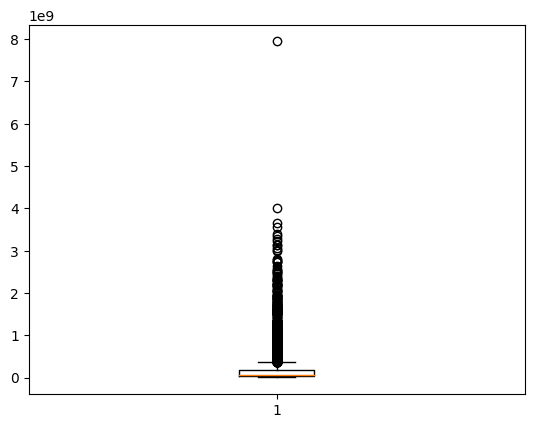

In [ ]:
q1 = cost['U1401']['value'].quantile(.25)
q3 = cost['U1401']['value'].quantile(.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound, upper_bound)

print((len(cost['U1401'][cost['U1401']['value'] > upper_bound]) / len(cost['U1401']))*100)

plt.boxplot(cost['U1401']['value'])
plt.show()

In [ ]:
cost['U1401']

,Address,value
0,20001383919,520292940
1,20001383923,112480000
2,20001383925,79647552
3,20001383929,38494776
4,20001383932,98822000
...,...,...
18365,23006709820,98890000
18366,23006709823,62119000
18367,23006709826,438877000
18368,23006709827,102924000


In [ ]:
print(u1401['U1401P3S01'].code.value_counts())
print('----------------------------------')
print(u1401['U1401P3S02'].code.value_counts())
print('----------------------------------')
print(u1401['U1401P3S03'].code.value_counts())

#P3S02 --> drug

code
11731    17016
11724    16578
11732    16392
11441    14822
11231    14521
         ...  
11933        7
11238        6
11239        4
11318        2
11319        1
Name: count, Length: 194, dtype: int64
----------------------------------
code
22111    1658
22113    1193
Name: count, dtype: int64
----------------------------------
code
31317    4743
31251    1591
31212    1232
31216    1192
31222    1134
         ... 
31237       9
31258       8
31213       5
31257       3
31214       2
Name: count, Length: 81, dtype: int64


***  محاسبه مجموع هزینه های غیر خوراکی ***

In [ ]:
food_cost = {k : pd.DataFrame() for k in file_names}
food_cost['U1401'] = pd.DataFrame(cost_sheet_divided['U1401']['U1401P3S01'].groupby('Address').agg({'value' : 'sum'})).reset_index()
food_cost['U1401'].columns = ['Address', 'value']
food_cost['U1401']

,Address,value
0,20001383919,13051000
1,20001383923,39670000
2,20001383925,19360000
3,20001383929,22626000
4,20001383932,47132000
...,...,...
18276,23006709820,40390000
18277,23006709823,20529000
18278,23006709826,16407000
18279,23006709827,13404000


In [ ]:
print(f"intersection = {len(set(list(food_cost['U1401'].Address)) & set(list(cost['U1401'].Address)))}")
print(f"len cost.Address = {len(cost['U1401'].Address)}")
print(f"len food_cost.Address = {len(food_cost['U1401'].Address)}")

intersection = 18281
len cost.Address = 18370
len food_cost.Address = 18281


In [ ]:
total_cost = {k : pd.DataFrame() for k in file_names}
total_cost['U1401'] = pd.merge(cost['U1401'], food_cost['U1401'], how = 'outer', on = 'Address', )
total_cost['U1401'].columns = ['Address', 'total_cost', 'edible_cost']
total_cost['U1401'].loc[(total_cost['U1401']['total_cost'].isna()) | (total_cost['U1401']['edible_cost'].isna())]

,Address,total_cost,edible_cost
876,20102398535,7000000,NaN
877,20102398620,9000000,NaN
878,20102398622,31714000,NaN
903,20103399125,11000000,NaN
916,20104399330,5150000,NaN
...,...,...,...
17618,22907696023,3114388,NaN
17658,22908696723,8382388,NaN
17959,23002701926,20000000,NaN
17988,23002702435,15000000,NaN


Filling None value with median

In [ ]:
total_cost_median = total_cost['U1401'][~total_cost['U1401'].isna()].median()
total_cost['U1401'].fillna(total_cost_median, inplace = True)

In [ ]:
total_cost['U1401']['inedible_cost'] = total_cost['U1401']['total_cost'] - total_cost['U1401']['edible_cost']
total_cost['U1401']

,Address,total_cost,edible_cost,inedible_cost
0,20001383919,520292940,13051000.0,507241940.0
1,20001383923,112480000,39670000.0,72810000.0
2,20001383925,79647552,19360000.0,60287552.0
3,20001383929,38494776,22626000.0,15868776.0
4,20001383932,98822000,47132000.0,51690000.0
...,...,...,...,...
18365,23006709820,98890000,40390000.0,58500000.0
18366,23006709823,62119000,20529000.0,41590000.0
18367,23006709826,438877000,16407000.0,422470000.0
18368,23006709827,102924000,13404000.0,89520000.0


In [ ]:
print(f"percentage of family with negative inedible_cost = {len(total_cost['U1401'].loc[total_cost['U1401']['inedible_cost'] < 0]) / len(total_cost['U1401']) * 100}")

percentage of family with negative inedible_cost = 0.391943385955362


In [ ]:
save_excel(total_cost, 'C:/Python/Quera/Quera_Projects/FirstProject/Project1_data', 'Total Cost For Each Family U1401', 'xlsx')

OSError: Cannot save file into a non-existent directory: 'C:/Python/Quera/Quera_Projects/FirstProject/Project1_data'

***  محاسبه مجموع هزینه های حمل و نقل ***

In [ ]:
transportaion_codes = [71, 72, 72]
transportaion_cost = {k : pd.DataFrame() for k in file_names}

for code in transportaion_codes:
    new_cost = pd.DataFrame(u1401['U1401P3S13'][u1401['U1401P3S13']['code'].astype('str').str.startswith(f'{code}')])
    transportaion_cost['U1401'] = pd.concat([transportaion_cost['U1401'], new_cost])

transportaion_cost['U1401']

,Address,code,value
750,10001001920,71314,500000
913,10005004613,71116,45000000
939,10009008508,71311,2000000
1090,10012010120,71116,850000000
1580,10010008920,71311,11000000
...,...,...,...
246267,13001375923,72119,2500000
246268,13001375923,72122,18000000
246285,13001369614,72117,4500000
246286,13001369614,72119,1000000


In [ ]:
transportaion_cost['U1401'] = pd.DataFrame(transportaion_cost['U1401'].groupby('Address').agg({'value' : 'sum'})).reset_index()
transportaion_cost['U1401'].columns = ['Address', 'value']
transportaion_cost['U1401']

,Address,value
0,10001000111,21400000
1,10001000117,21360000
2,10001000123,20800000
3,10001000211,4800000
4,10001000214,21100000
...,...,...
10720,13006383611,8100000
10721,13006383620,9600000
10722,13006383623,15700000
10723,13006383820,17900000


In [ ]:
save_excel(transportaion_cost, 'C:/Python/Quera/Quera_Projects/FirstProject/Project1_data', 'Transportation Cost U1401', 'xlsx')